<h1 style="font-size: 32px; text-align: center;">Introduction to Computer Programming for the Physical Sciences</h1>
<h2 style="font-size: 24px; text-align: center;">Diego Gonzalez Hernandez</h2>
<h3 style="font-size: 24px; text-align: center;">Spring 2025</h2>

## Working on Section Problems

<ul style="list-style: none;">
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Get into groups of 2 or 3, with at least one laptop per group.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Discuss with each other and attempt each problem yourselves first without AI support for 10-15 mins.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;">
</span>Input the problem prompt into the AI chatbox, use its answer to verify your own, or to learn how it should be solved.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;">
</span>For section problems, you can omit most of the commenting and focus on learning coding. For more difficult problems, minimal comments are still recommended as a way of organizing your own thoughts.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Please abide by the <b><a href="https://github.com/enigma-igm/Phys29/blob/main/using_AI_tools.md">Policy and Guidelines on Using AI Tools</a></b></li>

# Section 10

## Problem 1

In [1]:
from scipy import optimize, integrate
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

We return to the Poisson distribution introduced in Section 7 and in lecture, as a model for the number of meteors impacting Earth:
\begin{align}
p(k;\mu) = \frac{\mu^{k}e^{-\mu}}{k!}
\end{align} 

Now let's take a look at the data for extinction level meteor impacts specifically, and infer the best fit $\mu$ parameter in the poisson model via likelihood calculation. 

Since one extinction level impact happened during the 200 million years dinosaurs lived, assuming constant impact rate, that's 5 impacts every billion years. We'll use that as our first data point (5 counts per billion years). If we also assume that the Moon and the Earth experience the same rate of impacts, then we can look to the Moon for our second data point. There are around 10 extinction level impacts on the near-side of the Moon. After adjusting for the Moon's size relative to Earth's and assuming the far-side of the Moon has the same number of impacts, then the Moon gives us another data point of 20 impacts per billion years.

**In summary, we have two data points, 5 counts per billion years, and 20 counts per billion years, assumed to be drawn from the same Poisson distribution with some $\mu$.**

a. Write a function that calculates the negative log likelihood, $-ln\mathcal{L}$, of observing these two data points given the model parameter $\mu$, $\mathcal{L}(N_{obs}|\mu)$ (you can find a function/method in the ```scipy.stats.poisson``` module for the log pmf calculation: ```poisson.logpmf```). Plot $-ln\mathcal{L}$ vs $\mu$ for a range of $\mu$, estimate the best-fit $\mu$ by eye. (Hint: You will need to calculate logpmf twice for each value of mu, once for each of our two $N_{obs}$ values, and combine them appropriately for your likelihood)

b. Use ```scipy.optimize.minimize``` to minimize the negative log likelihood function and find the best-fit $\mu$. Does it agree with your estimate? (Hint: You may need to pass in your $N_{obs}$ as an arg in the minimize function)

c. Calculate the posterior distribution for $\mu$: 
$$P(\mu|N_{obs}) = \frac{\mathcal{L}(N_{obs}|\mu)P(\mu)}{\int \mathcal{L}(N_{obs}|\mu)P(\mu)}$$
You can assume an uninformative prior, $P(\mu)$, (uniform probability except negative values are not allowed). And plot this posterior distribution. (Hint: Recall that the posterior is defined in terms of the likelihood, NOT the log likelihood)

### a

In [2]:

def neg_lnL(mu, N_obs):
    # Logpmf will give two values (one for each of my N_obs), which we then sum over and return the negative value of. 
    return -np.sum(poisson.logpmf(N_obs, mu))
    

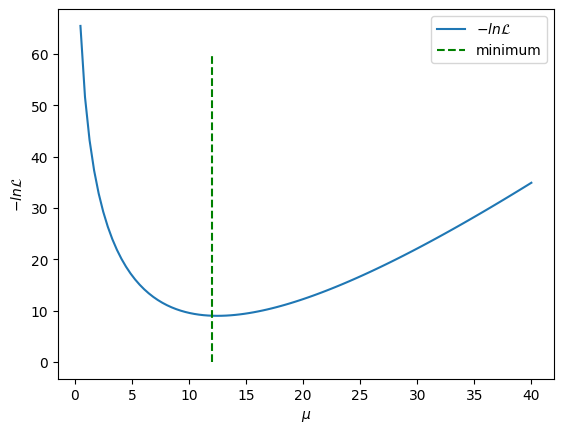

In [50]:
N_obs = [5,20]
mu_list = np.linspace(0.5, 40, 100)
neg_lnL_list = [neg_lnL(mu, N_obs) for mu in mu_list]
plt.plot(mu_list, neg_lnL_list, label=r'$-ln\mathcal{L}$')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$-ln\mathcal{L}$')
# Guess min at mu=12 by eye
plt.vlines(12, 0, 60, ls='--', color='g', label='minimum')
plt.legend()
plt.show()

### b

In [51]:
mu_guess = 12
result = optimize.minimize(neg_lnL, mu_guess, args=(N_obs), bounds=[(0, np.inf)])

print('best fit mu: ', result.x[0])

best fit mu:  12.499995128610284


### c

max posterior mu:  12.502237623762376


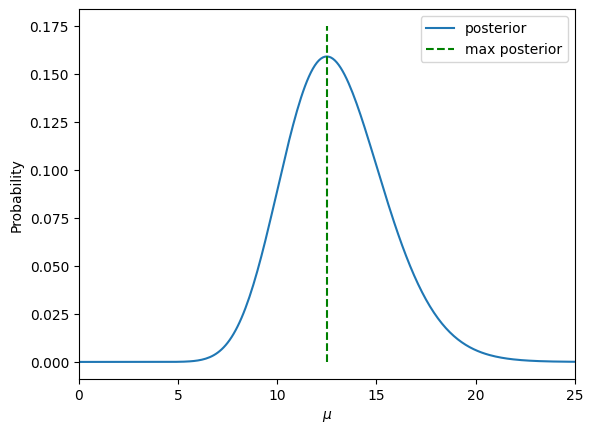

In [52]:
def posterior(mu_list, N_obs):

    # Calculate the log likelihood and uniform prior
    lnL_values = np.array([-neg_lnL(mu, N_obs) for mu in mu_list])
    #unif_prior = (mu_list[-1] - mu_list[0])**-1
    unif_prior = 1
    
    # Multiply the likelihood and prior
    P_unnorm = np.exp(lnL_values)*unif_prior

    # Integrate posterior denominator
    P_norm = integrate.trapezoid(P_unnorm, mu_list)

    # Calculate posterior
    posterior = P_unnorm/P_norm
    
    return posterior
    

N_points = 10000
mu_list = np.linspace(1e-3, 1000, N_points)
post_L = posterior(mu_list, N_obs)
plt.xlabel(r'$\mu$')
plt.xlim((0, 25))
plt.ylabel('Probability')
plt.plot(mu_list, post_L, label='posterior')
#plt.plot(mu_list, np.ones(N_points)/N_points, label='prior')
plt.vlines(mu_list[np.argmax(post_L)], 0, 1.1*np.amax(post_L), ls='--', color='g', label='max posterior')
plt.legend()
print('max posterior mu: ', mu_list[np.argmax(post_L)])